In [95]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [96]:
df = pd.read_csv("AIP_DATA/clean_data.csv")

In [97]:
df

,National women's sample weight (6 decimals),Respondent's month of birth,Respondent's year of birth,Respondent's current age,Age in 5-year groups,Age in 5-year groups.1,Result of individual interview,Ever-married sample,State,Type of place of residence,...,Wealth index factor score (5 decimals) - urban,Wealth index - urban within state,Wealth index - rural,Wealth index factor score (5 decimals) - rural,Wealth index - rural within state,Seen family planning message on a wall painting or hoarding,"Male condom protects against pregnancy, when used correctly",Knows place to obtain family planning method,Category 1 (2-levels),Category 2 (4-levels)
0,191760,4,1993,22,20-24,25-29,completed,all woman sample,andaman and nicobar islands,urban,...,-106084.0,poorest,NaN,NaN,NaN,yes,most of the time,yes,No or Traditional Methods,No or Traditional Methods
1,191760,1,1975,40,40-44,40-44,completed,all woman sample,andaman and nicobar islands,urban,...,-4964.0,poorer,NaN,NaN,NaN,yes,most of the time,yes,No or Traditional Methods,No or Traditional Methods
2,191760,4,1978,37,35-39,50-54,completed,all woman sample,andaman and nicobar islands,urban,...,57777.0,richer,NaN,NaN,NaN,yes,most of the time,yes,Any Modern Method,Permanent Methods (PM)
3,191760,7,1982,33,30-34,40-44,completed,all woman sample,andaman and nicobar islands,urban,...,48253.0,richer,NaN,NaN,NaN,yes,most of the time,yes,Any Modern Method,Permanent Methods (PM)
4,191760,2,1980,35,35-39,40-44,completed,all woman sample,andaman and nicobar islands,urban,...,144775.0,richest,NaN,NaN,NaN,yes,most of the time,yes,Any Modern Method,Permanent Methods (PM)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63691,8236511,8,1969,45,45-49,50-54,completed,all woman sample,telangana,urban,...,-1615.0,poorer,NaN,NaN,NaN,no,most of the time,no,Any Modern Method,Permanent Methods (PM)
63692,8236511,5,1972,42,40-44,45-49,completed,all woman sample,telangana,urban,...,-44302.0,poorer,NaN,NaN,NaN,no,sometimes,no,Any Modern Method,Permanent Methods (PM)
63693,2380715,4,1975,40,40-44,40-44,completed,all woman sample,telangana,rural,...,NaN,NaN,richer,81698.0,richer,yes,most of the time,yes,Any Modern Method,Permanent Methods (PM)
63694,2380715,8,1995,19,15-19,25-29,completed,all woman sample,telangana,rural,...,NaN,NaN,richer,76373.0,richer,yes,most of the time,yes,No or Traditional Methods,No or Traditional Methods


In [98]:
coded = df.copy()
coded = coded.fillna(-1)

for col in coded.columns:
    if coded[col].dtype == object:
        coded[col] = coded[col].astype('category')
        coded[col] = pd.to_numeric(coded[col].cat.codes)

In [99]:
coded

,National women's sample weight (6 decimals),Respondent's month of birth,Respondent's year of birth,Respondent's current age,Age in 5-year groups,Age in 5-year groups.1,Result of individual interview,Ever-married sample,State,Type of place of residence,...,Wealth index factor score (5 decimals) - urban,Wealth index - urban within state,Wealth index - rural,Wealth index factor score (5 decimals) - rural,Wealth index - rural within state,Seen family planning message on a wall painting or hoarding,"Male condom protects against pregnancy, when used correctly",Knows place to obtain family planning method,Category 1 (2-levels),Category 2 (4-levels)
0,191760,4,1993,22,1,2,0,0,0,1,...,-106084.0,3,0,-1.0,0,1,2,1,1,1
1,191760,1,1975,40,5,5,0,0,0,1,...,-4964.0,2,0,-1.0,0,1,2,1,1,1
2,191760,4,1978,37,4,7,0,0,0,1,...,57777.0,4,0,-1.0,0,1,2,1,0,2
3,191760,7,1982,33,3,5,0,0,0,1,...,48253.0,4,0,-1.0,0,1,2,1,0,2
4,191760,2,1980,35,4,5,0,0,0,1,...,144775.0,5,0,-1.0,0,1,2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63691,8236511,8,1969,45,6,7,0,0,31,1,...,-1615.0,2,0,-1.0,0,0,2,0,0,2
63692,8236511,5,1972,42,5,6,0,0,31,1,...,-44302.0,2,0,-1.0,0,0,4,0,0,2
63693,2380715,4,1975,40,5,5,0,0,31,0,...,-1.0,0,4,81698.0,4,1,2,1,0,2
63694,2380715,8,1995,19,0,2,0,0,31,0,...,-1.0,0,4,76373.0,4,1,2,1,1,1


In [100]:
y2 = coded['Category 1 (2-levels)']
y4 = coded['Category 2 (4-levels)']
X = coded.drop(columns = ['Category 1 (2-levels)', 'Category 2 (4-levels)'])

X2_train, X2_valid, y2_train, y2_valid = train_test_split(X, y2, test_size = 0.3)
X4_train, X4_valid, y4_train, y4_valid = train_test_split(X, y4, test_size = 0.3)

In [101]:
cat1clf = RandomForestClassifier(n_estimators=10000)
cat1clf.fit(X2_train, y2_train)

cat2clf = RandomForestClassifier(n_estimators=10000)
cat2clf.fit(X4_train, y4_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [102]:
cat1sel = SelectFromModel(cat1clf)
cat1sel.fit(X2_train, y2_train)

cat2sel = SelectFromModel(cat2clf)
cat2sel.fit(X4_train, y4_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10000,
                                                 n_jobs=None, oob_score=Fals

In [103]:
cat1sel.get_support()
cat2sel.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False,  True, False, False, False,
       False, False,

In [104]:
cat1_selected_feat = X2_train.columns[(cat1sel.get_support())]
cat2_selected_feat = X4_train.columns[(cat2sel.get_support())]

In [105]:
cat1_y_pred = cat1clf.predict(X2_valid)
cat2_y_pred = cat2clf.predict(X4_valid)

In [106]:
accuracy_score(y2_valid, cat1_y_pred)

0.9998430059134439

In [107]:
accuracy_score(y4_valid, cat2_y_pred)

0.9999476686378146

In [108]:
cat1_selected_feat

Index(['Method Currently Used: Not Using Any Method',
       'Method Currently Used: Diaphragm',
       'Method Currently Used: Male Condom',
       'Method Currently Used: Male Strilization',
       'Method Currently Used: Periodic Abstinense (Rhythm)',
       'Living children at first use', 'Children at first use (grouped)',
       'Current contraceptive method', 'Current use by method type',
       'Years since sterilization', 'Age at sterilization',
       'Marital duration at sterilization', 'Parity at sterilization',
       'Months of use of current method', 'Pattern of use', 'Intention to use',
       'Contraceptive use and intention',
       'Told sterilization would mean no more children',
       'Fertility preference', 'Desire for more children',
       'Decision maker for using contraception', 'Fertility preference.2',
       'Desire for more children.2', 'Regret sterilization',
       'Told by a health worker about any methods of family planning'],
      dtype='object')

In [109]:
cat2_selected_feat

Index(['Method Currently Used: Not Using Any Method',
       'Method Currently Used: Pill', 'Method Currently Used: Diaphragm',
       'Method Currently Used: Male Condom', 'Living children at first use',
       'Children at first use (grouped)', 'Current contraceptive method',
       'Current use by method type', 'Years since sterilization',
       'Age at sterilization', 'Marital duration at sterilization',
       'Parity at sterilization', 'Months of use of current method',
       'Pattern of use', 'Intention to use', 'Contraceptive use and intention',
       'Told sterilization would mean no more children',
       'Fertility preference', 'Desire for more children',
       'Decision maker for using contraception', 'Fertility preference.2',
       'Desire for more children.2', 'Regret sterilization',
       'Told by a health worker about any methods of family planning'],
      dtype='object')

In [124]:
cat1feats = {}
cat2feats = {}

for name, importance in zip(X.columns, cat1clf.feature_importances_):
    cat1feats[name] = importance
    
for name, importance in zip(X.columns, cat2clf.feature_importances_):
    cat2feats[name] = importance

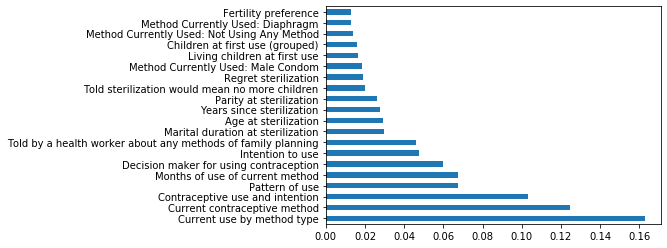

In [116]:
feat_importances = pd.Series(cat1clf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

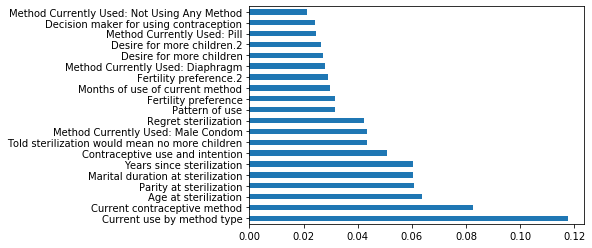

In [145]:
feat_importances = pd.Series(cat2clf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')